<a href="https://colab.research.google.com/github/ChangCorp/finalproject/blob/main/Stage_3_Chang_Corp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import pickle
from pathlib import Path

%matplotlib inline
matplotlib.style.use('ggplot')

In [ ]:
df_train = pd.read_csv('https://raw.githubusercontent.com/ChangCorp/finalproject/main/train_delimited_comma.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/ChangCorp/finalproject/main/test_delimited_comma.csv')

In [ ]:
# mengubah nama kolom 'y' menjadi 'subscribed' untuk menghindari kebingungan saat modeling dan validation
df_train=df_train.rename(columns = {'y':'subscribed'})
df_test=df_test.rename(columns = {'y':'subscribed'})

# Preprocessing

In [ ]:
# Handle Missing Values


# Training - Nilai unknown pada `job` berubah menyesuaikan data `education`

df_train.loc[(df_train.job == "unknown") & (df_train.education == "primary"),"job"] = "blue-collar"
df_train.loc[(df_train.job == "unknown") & (df_train.education == "secondary"),"job"] = "blue-collar"
df_train.loc[(df_train.job == "unknown") & (df_train.education == "tertiary"),"job"] = "management"
df_train.loc[(df_train.job == "unknown") & (df_train.education == "unknown"),"job"] = "blue-collar"

# Training - Nilai unknown pada `education` berubah menyesuaikan data modus pada `job`
df_train.loc[(df_train.education == "unknown") & (df_train.job == "admin."),"education"] = "secondary"
df_train.loc[(df_train.education == "unknown") & (df_train.job == "blue-collar"),"education"] = "secondary"
df_train.loc[(df_train.education == "unknown") & (df_train.job == "entrepreneur"),"education"] = "tertiary"
df_train.loc[(df_train.education == "unknown") & (df_train.job == "housemaid"),"education"] = "primary"
df_train.loc[(df_train.education == "unknown") & (df_train.job == "management"),"education"] = "tertiary"
df_train.loc[(df_train.education == "unknown") & (df_train.job == "retired"),"education"] = "secondary"
df_train.loc[(df_train.education == "unknown") & (df_train.job == "self-employed"),"education"] = "tertiary"
df_train.loc[(df_train.education == "unknown") & (df_train.job == "services"),"education"] = "secondary"
df_train.loc[(df_train.education == "unknown") & (df_train.job == "student"),"education"] = "secondary"
df_train.loc[(df_train.education == "unknown") & (df_train.job == "technician"),"education"] = "secondary"
df_train.loc[(df_train.education == "unknown") & (df_train.job == "unemployed"),"education"] = "secondary"
df_train.loc[(df_train.education == "unknown"),"education"] = "secondary"

# Training - Nilai unknown pada `contact` berubah menyesuaikan data modus
df_train["contact"].replace(["unknown"],df_train["contact"].mode(),inplace = True)

# Testing - Nilai unknown pada `job` berubah menyesuaikan data `education`, mengikuti rules dataset Train
df_test.loc[(df_test.job == "unknown") & (df_test.education == "primary"),"job"] = "blue-collar"
df_test.loc[(df_test.job == "unknown") & (df_test.education == "secondary"),"job"] = "blue-collar"
df_test.loc[(df_test.job == "unknown") & (df_test.education == "tertiary"),"job"] = "management"
df_test.loc[(df_test.job == "unknown") & (df_test.education == "unknown"),"job"] = "blue-collar"

# Testing = Nilai unknown pada `education` berubah menyesuaikan data modus pada `job`, mengikuti rules dataset Train
df_test.loc[(df_test.education == "unknown") & (df_test.job == "admin."),"education"] = "secondary"
df_test.loc[(df_test.education == "unknown") & (df_test.job == "blue-collar"),"education"] = "secondary"
df_test.loc[(df_test.education == "unknown") & (df_test.job == "entrepreneur"),"education"] = "tertiary"
df_test.loc[(df_test.education == "unknown") & (df_test.job == "housemaid"),"education"] = "primary"
df_test.loc[(df_test.education == "unknown") & (df_test.job == "management"),"education"] = "tertiary"
df_test.loc[(df_test.education == "unknown") & (df_test.job == "retired"),"education"] = "secondary"
df_test.loc[(df_test.education == "unknown") & (df_test.job == "self-employed"),"education"] = "tertiary"
df_test.loc[(df_test.education == "unknown") & (df_test.job == "services"),"education"] = "secondary"
df_test.loc[(df_test.education == "unknown") & (df_test.job == "student"),"education"] = "secondary"
df_test.loc[(df_test.education == "unknown") & (df_test.job == "technician"),"education"] = "secondary"
df_test.loc[(df_test.education == "unknown") & (df_test.job == "unemployed"),"education"] = "secondary"
df_test.loc[(df_test.education == "unknown"),"education"] = "secondary"

# Testing - Nilai unknown pada `contact` berubah menyesuaikan data modus
df_train["contact"].replace(["unknown"],df_train["contact"].mode(),inplace = True)

/tmp/ipython-input-5-1606947380.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train["contact"].replace(["unknown"],df_train["contact"].mode(),inplace = True)


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
df_train['balance_norm']=MinMaxScaler().fit_transform(df_train['balance'].values.reshape(len(df_train),1))
# df_train['balance_std']=StandardScaler().fit_transform(df_train['balance'].values.reshape(len(df_train),1))

In [ ]:
# MinMax Scaler for Normalization df_test
fit = MinMaxScaler().fit(df_train['balance'].values.reshape(len(df_train),1)) # fit using parameters from df_train
df_test['balance_norm'] = fit.transform(df_test['balance'].values.reshape(len(df_test),1))
print(df_test[['balance','balance_norm']].describe())
print('')

            balance  balance_norm
count   4521.000000   4521.000000
mean    1422.657819      0.085719
std     3009.638142      0.027324
min    -3313.000000      0.042725
25%       69.000000      0.073430
50%      444.000000      0.076834
75%     1480.000000      0.086240
max    71188.000000      0.719109



In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
df_train['age_norm']=MinMaxScaler().fit_transform(df_train['age'].values.reshape(len(df_train),1))

In [ ]:
fit = MinMaxScaler().fit(df_train['age'].values.reshape(len(df_train),1)) # fit using parameters from df_train
df_test['age_norm'] = fit.transform(df_test['age'].values.reshape(len(df_test),1))
print(df_test[['age','age_norm']].describe())
print('')

               age     age_norm
count  4521.000000  4521.000000
mean     41.170095     0.300910
std      10.576211     0.137353
min      19.000000     0.012987
25%      33.000000     0.194805
50%      39.000000     0.272727
75%      49.000000     0.402597
max      87.000000     0.896104



In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
df_train['campaign_norm']=MinMaxScaler().fit_transform(df_train['campaign'].values.reshape(len(df_train),1))
# df_train['balance_std']=StandardScaler().fit_transform(df_train['balance'].values.reshape(len(df_train),1))

In [ ]:
# MinMax Scaler for Normalization df_test
fit = MinMaxScaler().fit(df_train['campaign'].values.reshape(len(df_train),1)) # fit using parameters from df_train
df_test['campaign_norm'] = fit.transform(df_test['campaign'].values.reshape(len(df_test),1))
print(df_test[['campaign','campaign_norm']].describe())
print('')

          campaign  campaign_norm
count  4521.000000    4521.000000
mean      2.793630       0.028930
std       3.109807       0.050158
min       1.000000       0.000000
25%       1.000000       0.000000
50%       2.000000       0.016129
75%       3.000000       0.032258
max      50.000000       0.790323



In [ ]:
def segment(x) :
    if x['previous'] == 0 :
        hasil = 0
    elif x['previous'] > 0  :
        hasil = 1
    return hasil

df_train['ever_contacted'] = df_train.apply(segment, axis=1)
df_test['ever_contacted'] = df_test.apply(segment, axis=1)

In [ ]:
# Label Encoding - df_train (untuk feature dengan distinct values 2, atau tipe ordinal)

# Encoding - Education (Tipe ordinal - punya urutan)
df_train.loc[(df_train.education == "tertiary"),"education"] = 2
df_train.loc[(df_train.education == "secondary") ,"education"] = 1
df_train.loc[(df_train.education == "primary"),"education"] = 0

# Encoding - Default
df_train.loc[(df_train.default == "yes"),"default"] = 1
df_train.loc[(df_train.default == "no") ,"default"] = 0

# Encoding - Housing
df_train.loc[(df_train.housing == "yes"),"housing"] = 1
df_train.loc[(df_train.housing == "no") ,"housing"] = 0

# Encoding - Loan
df_train.loc[(df_train.loan == "yes"),"loan"] = 1
df_train.loc[(df_train.loan == "no") ,"loan"] = 0

# Encoding - Contact
df_train.loc[(df_train.contact == "telephone"),"contact"] = 1
df_train.loc[(df_train.contact == "cellular") ,"contact"] = 0

# Encoding - Poutcome
df_train.loc[(df_train.poutcome == "success"),"poutcome_success"] = 1
df_train.loc[(df_train.poutcome == "unknown") ,"poutcome_success"] = 0
df_train.loc[(df_train.poutcome == "failure") ,"poutcome_success"] = 0
df_train.loc[(df_train.poutcome == "other") ,"poutcome_success"] = 0

# Encoding - Subscribed
df_train.loc[(df_train.subscribed == "yes"),"subscribed"] = 1
df_train.loc[(df_train.subscribed == "no") ,"subscribed"] = 0

# Encoding - Marital
df_train.loc[(df_train.marital == "married"),"is_married"] = 1
df_train.loc[(df_train.marital == "single") ,"is_married"] = 0
df_train.loc[(df_train.marital == "divorced"),"is_married"] = 0

# Adjusting data type
df_train.education = df_train.education.astype(int)
df_train.default = df_train.default.astype(int)
df_train.housing = df_train.housing.astype(int)
df_train.loan = df_train.loan.astype(int)
df_train.contact = df_train.contact.astype(int)
df_train.poutcome_success = df_train.poutcome_success.astype(int)
df_train.subscribed = df_train.subscribed.astype(int)
df_train.is_married = df_train.is_married.astype(int)

In [ ]:
# Label Encoding - df_test (untuk feature dengan distinct values 2, atau tipe ordinal)

# Encoding - Education (Tipe ordinal - punya urutan)
df_test.loc[(df_test.education == "tertiary"),"education"] = 2
df_test.loc[(df_test.education == "secondary") ,"education"] = 1
df_test.loc[(df_test.education == "primary"),"education"] = 0

# Encoding - Default
df_test.loc[(df_test.default == "yes"),"default"] = 1
df_test.loc[(df_test.default == "no") ,"default"] = 0

# Encoding - Housing
df_test.loc[(df_test.housing == "yes"),"housing"] = 1
df_test.loc[(df_test.housing == "no") ,"housing"] = 0

# Encoding - Loan
df_test.loc[(df_test.loan == "yes"),"loan"] = 1
df_test.loc[(df_test.loan == "no") ,"loan"] = 0

# Encoding - Contact
df_test.loc[(df_test.contact == "telephone"),"contact"] = 1
df_test.loc[(df_test.contact == "cellular") ,"contact"] = 0

# Encoding - Poutcome
df_test.loc[(df_test.poutcome == "success"),"poutcome_success"] = 1
df_test.loc[(df_test.poutcome == "unknown") ,"poutcome_success"] = 0
df_test.loc[(df_test.poutcome == "failure") ,"poutcome_success"] = 0
df_test.loc[(df_test.poutcome == "other") ,"poutcome_success"] = 0

# Encoding - Subscribed
df_test.loc[(df_test.subscribed == "yes"),"subscribed"] = 1
df_test.loc[(df_test.subscribed == "no") ,"subscribed"] = 0

# Encoding - Marital
df_test.loc[(df_test.marital == "married"),"is_married"] = 1
df_test.loc[(df_test.marital == "single") ,"is_married"] = 0
df_test.loc[(df_test.marital == "divorced"),"is_married"] = 0

# Handle 'unknown' in contact column of df_test
df_test["contact"].replace(["unknown"],df_test["contact"].mode(),inplace = True)

# Adjusting Data Type
df_test.education = df_test.education.astype(int)
df_test.default = df_test.default.astype(int)
df_test.housing = df_test.housing.astype(int)
df_test.loan = df_test.loan.astype(int)
df_test.contact = df_test.contact.astype(int)
df_test.poutcome_success = df_test.poutcome_success.astype(int)
df_test.subscribed = df_test.subscribed.astype(int)
df_test.is_married = df_test.is_married.astype(int)

/tmp/ipython-input-14-414964501.py:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test["contact"].replace(["unknown"],df_test["contact"].mode(),inplace = True)
/tmp/ipython-input-14-414964501.py:40: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test["contact"].replace(["unknown"],df_test["c

In [ ]:
# Job - df_train

# Job Group (Feature Extraction - Job Group first to reduce distinct values, some jobs are similar)
df_train.loc[df_train['job']=='blue-collar', 'job_group'] = 'blue_collar'
df_train.loc[df_train['job']=='technician', 'job_group'] = 'blue_collar'
df_train.loc[df_train['job']=='admin.', 'job_group'] = 'blue_collar'
df_train.loc[df_train['job']=='services', 'job_group'] = 'blue_collar'
df_train.loc[df_train['job']=='housemaid', 'job_group'] = 'blue_collar'
df_train.loc[df_train['job']=='management', 'job_group'] = 'management'
df_train.loc[df_train['job']=='self-employed', 'job_group'] = 'entrepreneur'
df_train.loc[df_train['job']=='entrepreneur', 'job_group'] = 'entrepreneur'
df_train.loc[df_train['job']=='unemployed', 'job_group'] = 'unemployed'
df_train.loc[df_train['job']=='student', 'job_group'] = 'student'
df_train.loc[df_train['job']=='retired', 'job_group'] = 'retired'

# OHE
df_train[['job_blue_collar','job_entrepreneur','job_management','job_retired','job_student','job_unemployed']] = pd.get_dummies(df_train['job_group'],prefix='job')

In [ ]:
# Job - df_test

# Job Group (Feature Extraction - Job Group first to reduce distinct values, some jobs are similar)
df_test.loc[df_test['job']=='blue-collar', 'job_group'] = 'blue_collar'
df_test.loc[df_test['job']=='technician', 'job_group'] = 'blue_collar'
df_test.loc[df_test['job']=='admin.', 'job_group'] = 'blue_collar'
df_test.loc[df_test['job']=='services', 'job_group'] = 'blue_collar'
df_test.loc[df_test['job']=='housemaid', 'job_group'] = 'blue_collar'
df_test.loc[df_test['job']=='management', 'job_group'] = 'management'
df_test.loc[df_test['job']=='self-employed', 'job_group'] = 'entrepreneur'
df_test.loc[df_test['job']=='entrepreneur', 'job_group'] = 'entrepreneur'
df_test.loc[df_test['job']=='unemployed', 'job_group'] = 'unemployed'
df_test.loc[df_test['job']=='student', 'job_group'] = 'student'
df_test.loc[df_test['job']=='retired', 'job_group'] = 'retired'

# OHE
df_test[['job_blue_collar','job_entrepreneur','job_management','job_retired','job_student','job_unemployed']] = pd.get_dummies(df_test['job_group'],prefix='job')

# Feature Selection

In [ ]:
df_train_fin = df_train[['education',
                         'housing',
                         'loan',
                         'subscribed',
                        #  'balance',
                         'balance_norm',
                        #  'age',
                         'age_norm',
                        #  'campaign',
                         'campaign_norm',
                         'ever_contacted',
                         'poutcome_success',
                         'is_married',
                         'job_blue_collar',
                         'job_entrepreneur',
                         'job_management',
                         'job_retired',
                         'job_student',
                         'job_unemployed'
]]

df_test_fin = df_test[['education',
                         'housing',
                         'loan',
                         'subscribed',
                        #  'balance',
                         'balance_norm',
                        #  'age',
                         'age_norm',
                        #  'campaign',
                         'campaign_norm',
                         'ever_contacted',
                         'poutcome_success',
                         'is_married',
                         'job_blue_collar',
                         'job_entrepreneur',
                         'job_management',
                         'job_retired',
                         'job_student',
                         'job_unemployed'
]]

# Modeling

DISCLAIMER: Akan digabungkan df_train dan df_test, dilakukan SMOTE, lalu di split lagi train dan testnya. Kami telah melakukan berbagai modeling dengan tahap train test split, lalu SMOTE. Nilai-nilai pada model evaluation selalu kecil, recall berkisar 0.16 - 0.4 (bahkan setelah hyperparameter tuning). Selain itu, jika menggunakan train test split yang disediakan Kaggle, modelnya terlalu overfit (accuracy, recall dll scorenya bisa > 0.95)

In [ ]:
df_all = pd.concat([df_train_fin,df_test_fin])
print('Jumlah baris duplicate: ', df_all.duplicated().sum())

Jumlah baris duplicate:  5651


In [ ]:
df_all1 = pd.concat([df_train,df_test])
print('Jumlah baris duplicate: ', df_all1.duplicated().sum())

Jumlah baris duplicate:  4521


In [ ]:
print('Jumlah baris duplicate: ', df_train_fin.duplicated().sum())

Jumlah baris duplicate:  1130


Rupanya df_test merupakan subset dari df_train. Selanjutnya, df_test tidak akan dipakai. Sebelum modeling, akan dilakukan drop duplicates.

In [ ]:
df_model = df_train_fin.drop_duplicates(keep='first')

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
import warnings
warnings.filterwarnings('ignore')

RUMPANG 12 = SPLIT X AND Y

definisikan variabel baru x dan y dimana x adalah semua kolom fitur dan y adalah semua kolom target

In [ ]:
X = df_model.drop('subscribed', axis=1)
y = df_model['subscribed']

In [ ]:
from imblearn.over_sampling import SMOTE

# Handle Imbalance Class using SMOTE
smote = SMOTE(random_state=42)
X_train_SMOTE, y_train_SMOTE = smote.fit_resample(X, y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_SMOTE, y_train_SMOTE, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))

    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

## Decision Tree

RUMPANG 13 : Decision Tree

Menggunakan model ML Decision Tree, tampilkan hasil classification pertamanya.

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Evaluasi
eval_classification(dt)

Accuracy (Test Set): 0.83
Precision (Test Set): 0.83
Recall (Test Set): 0.83
F1-Score (Test Set): 0.83
roc_auc (test-proba): 0.83
roc_auc (train-proba): 1.00


Terlihat model overfit. Akan coba dilakukan hyperparameter tuning

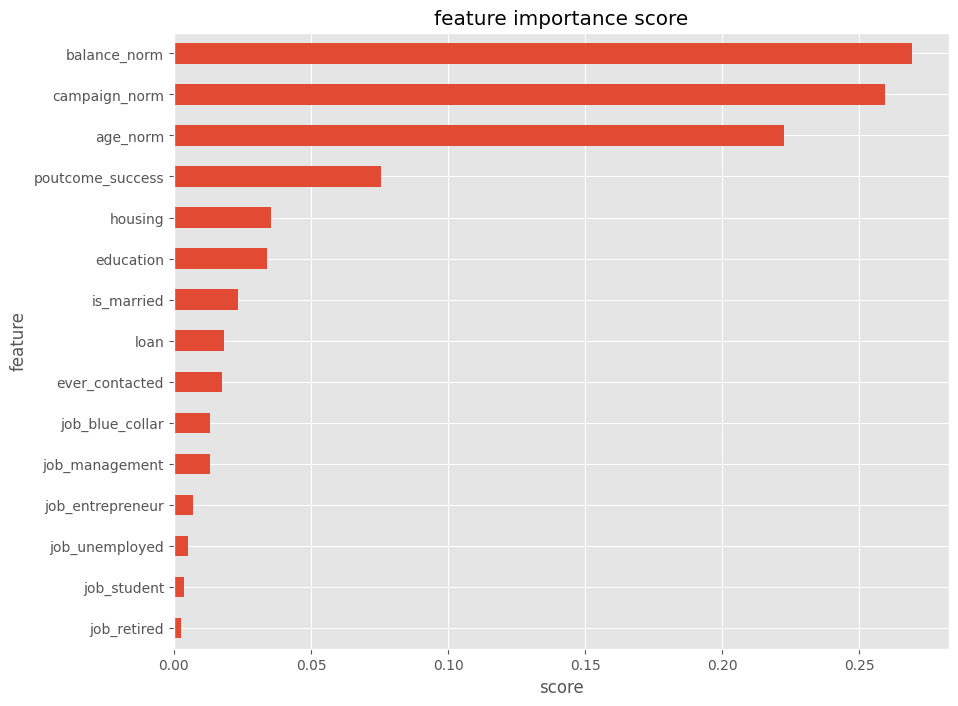

In [ ]:
show_feature_importance(dt)

RUMPANG 14 = HYPERPARAMETER

Perbaiki model Decision Tree yang overfit dengan :

1. parameter maksimal  = auto dan sqrt
2. menggunakan cv sebesar 5
3. menggunakan "recall" sebagai scoring

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
# max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
# min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
# min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
# max_features = ['auto', 'sqrt'] # Number of features to consider at every split
# criterion = ['gini','entropy']
# splitter = ['best','random']

max_depth = [int(x) for x in np.linspace(10, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [50, 100] # Minimum number of samples required to split a node
min_samples_leaf = [10, 20, 50] # Minimum number of samples required at each leaf node
max_features = [ 'auto', 'sqrt'] # Number of features to consider at every split
criterion = ['gini','entropy']
splitter = ['best','random']


hyperparameters = dict(max_depth=max_depth,
                       min_samples_split=min_samples_split,
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                      )

# Inisialisasi Model
dt_ht = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dt_ht, hyperparameters, cv=5, scoring='recall', random_state=42)
model.fit(X_train, y_train)

# Predict & Evaluation
y_pred = model.predict(X_test)#Check performa dari model
eval_classification(model)

Accuracy (Test Set): 0.75
Precision (Test Set): 0.78
Recall (Test Set): 0.71
F1-Score (Test Set): 0.74
roc_auc (test-proba): 0.84
roc_auc (train-proba): 0.88


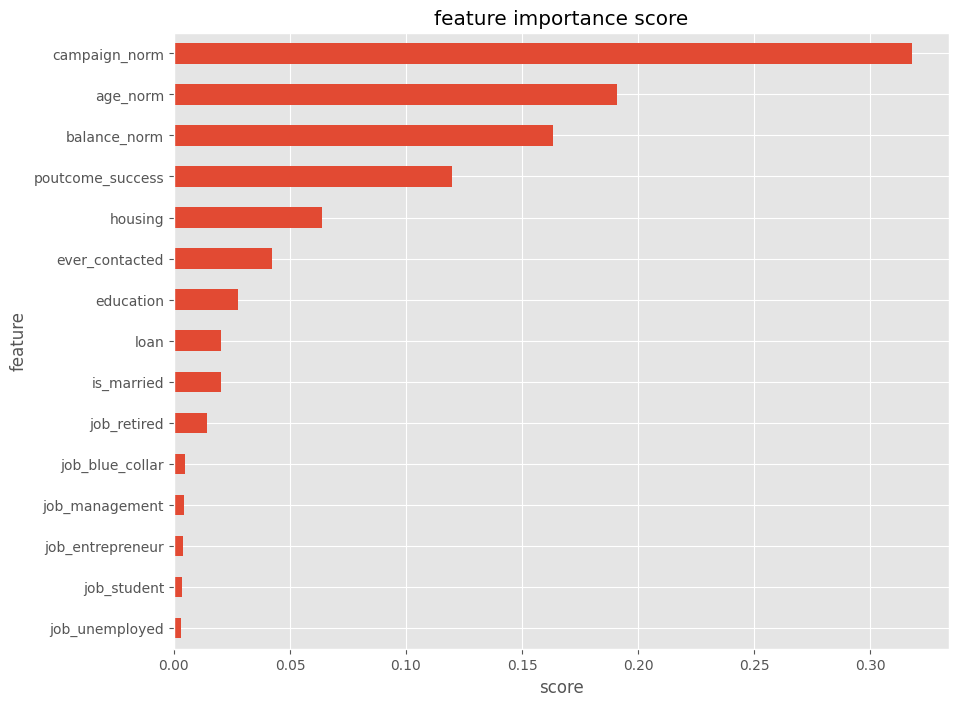

In [ ]:
show_feature_importance(model.best_estimator_)

Model tidak lagi overfit, tetapi nilai Recall menurun

## Random Forest

RUMPANG 15 : Random Forest

Menggunakan model ML Random Forest, tampilkan hasil classification pertamanya.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Evaluasi
eval_classification(rf)

Accuracy (Test Set): 0.86
Precision (Test Set): 0.87
Recall (Test Set): 0.85
F1-Score (Test Set): 0.86
roc_auc (test-proba): 0.93
roc_auc (train-proba): 1.00


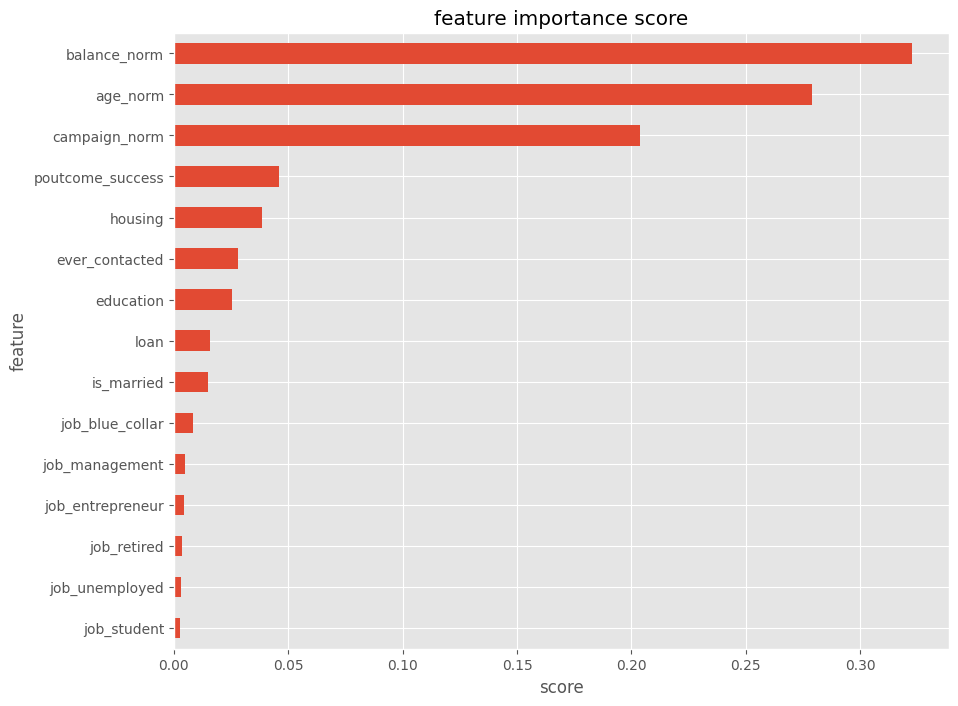

In [ ]:
show_feature_importance(rf)

In [ ]:
# tuning hyperparameter RF
from sklearn.model_selection import RandomizedSearchCV

# n_estimators = [int(x) for x in np.linspace(1, 200, 50)]
# criterion = ['gini', 'entropy']
# max_depth = [int(x) for x in np.linspace(2, 100, 50)]
# min_samples_split = [int(x) for x in np.linspace(2, 20, 10)]
# min_samples_leaf = [int(x) for x in np.linspace(2, 20, 10)]
# hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
#                        min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

n_estimators = [int(x) for x in np.linspace(10, 100, 50)]
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(2, 50, 10)]
min_samples_split = [int(x) for x in np.linspace(10, 50, 10)]
min_samples_leaf = [int(x) for x in np.linspace(10, 50, 10)]
hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rf_hp = RandomForestClassifier(random_state=42)
rs_hp = RandomizedSearchCV(rf_hp, hyperparameters, scoring='recall', random_state=42, cv=5)
rs_hp.fit(X_train, y_train)
eval_classification(rs_hp)

Accuracy (Test Set): 0.80
Precision (Test Set): 0.84
Recall (Test Set): 0.74
F1-Score (Test Set): 0.79
roc_auc (test-proba): 0.88
roc_auc (train-proba): 0.91


Hasil hyperparameter tuning --> model tidak overfit, nilai recall turun


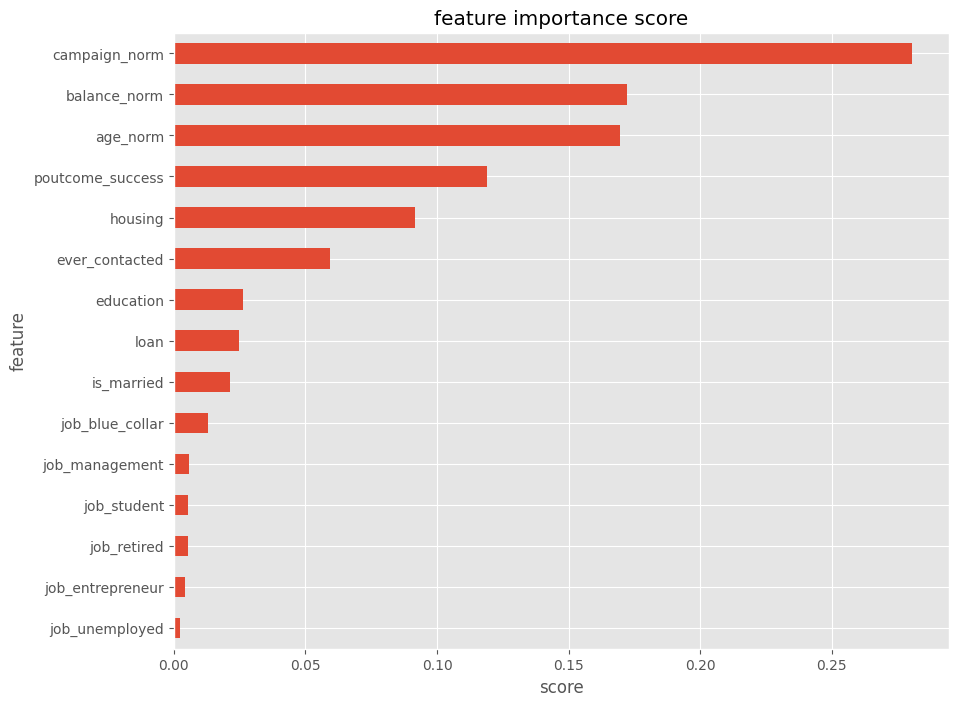

In [ ]:
show_feature_importance(rs_hp.best_estimator_)

## Logistic Regression

RUMPANG 16 : Logistic Regression

Menggunakan model ML Logistic Regression, tampilkan hasil classification pertamanya.

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Evaluasi
eval_classification(logreg)

Accuracy (Test Set): 0.67
Precision (Test Set): 0.69
Recall (Test Set): 0.62
F1-Score (Test Set): 0.65
roc_auc (test-proba): 0.73
roc_auc (train-proba): 0.73


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

penalty = ['l1', 'l2']
C = [float(x) for x in np.linspace(0.01, 0.05, 200)]
hyperparameters = dict(penalty=penalty, C=C, solver=['sag','saga'])

logreg = LogisticRegression()
rs = RandomizedSearchCV(logreg, hyperparameters, scoring='recall', random_state=42, cv=5, n_iter=50)
rs.fit(X_train, y_train)
eval_classification(rs)

Accuracy (Test Set): 0.66
Precision (Test Set): 0.68
Recall (Test Set): 0.62
F1-Score (Test Set): 0.65
roc_auc (test-proba): 0.73
roc_auc (train-proba): 0.73


Hasil hyperparameter tuning --> model tidak overfit, nilai recall turun

## KNN

RUMPANG 17 : KNN

Menggunakan model ML KNN, tampilkan hasil classification pertamanya.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Evaluasi
eval_classification(knn)

Accuracy (Test Set): 0.79
Precision (Test Set): 0.76
Recall (Test Set): 0.85
F1-Score (Test Set): 0.80
roc_auc (test-proba): 0.86
roc_auc (train-proba): 0.95


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_neighbors = list(range(1,30))
p=[1,2]
weights = ['uniform', 'distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm, weights=weights)

knn.fit(X_train, y_train)
rs_knn = RandomizedSearchCV(knn, hyperparameters, scoring='recall', random_state=42, cv=5)
rs_knn.fit(X_train, y_train)
eval_classification(rs_knn)

Accuracy (Test Set): 0.83
Precision (Test Set): 0.81
Recall (Test Set): 0.86
F1-Score (Test Set): 0.83
roc_auc (test-proba): 0.89
roc_auc (train-proba): 1.00


Hasil hyperparameter tuning --> model overfit, nilai recall meningkat

## Naive Bayes

RUMPANG 18 : Naive Bayes

Menggunakan model ML Naive Bayes, tampilkan hasil classification pertamanya.

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

# Evaluasi
eval_classification(nb)

Accuracy (Test Set): 0.63
Precision (Test Set): 0.75
Recall (Test Set): 0.40
F1-Score (Test Set): 0.52
roc_auc (test-proba): 0.70
roc_auc (train-proba): 0.71


## XGBoost

RUMPANG 19 : XGBoost

Menggunakan model ML XGBoost, tampilkan hasil classification pertamanya.

In [ ]:
from xgboost import XGBClassifier

xg = XGBClassifier(random_state=42)
xg.fit(X_train, y_train)

# Evaluasi
eval_classification(xg)

Accuracy (Test Set): 0.86
Precision (Test Set): 0.92
Recall (Test Set): 0.79
F1-Score (Test Set): 0.85
roc_auc (test-proba): 0.93
roc_auc (train-proba): 0.95


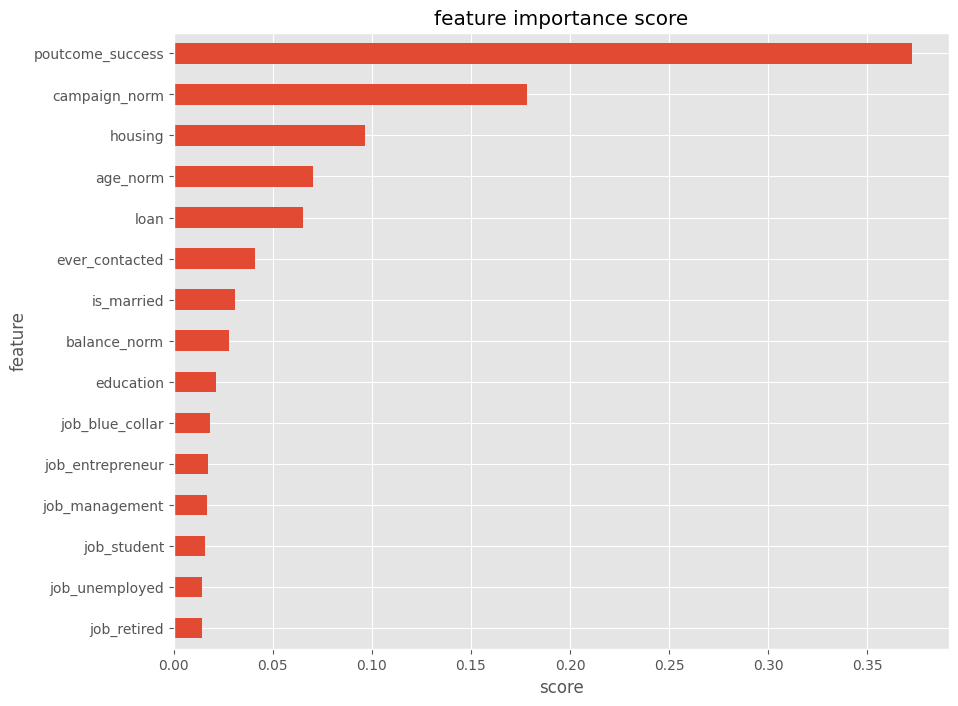

In [ ]:
show_feature_importance(xg)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(6, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='recall')
xg_tuned.fit(X_train,y_train)

# Predict & Evaluation
eval_classification(xg_tuned)

Accuracy (Test Set): 0.89
Precision (Test Set): 0.92
Recall (Test Set): 0.85
F1-Score (Test Set): 0.89
roc_auc (test-proba): 0.95
roc_auc (train-proba): 0.97


Setelah dilakukan hyperparameter tuning dapat dilihat bahwa hasil score meningkat dan tidak terjadi overfit

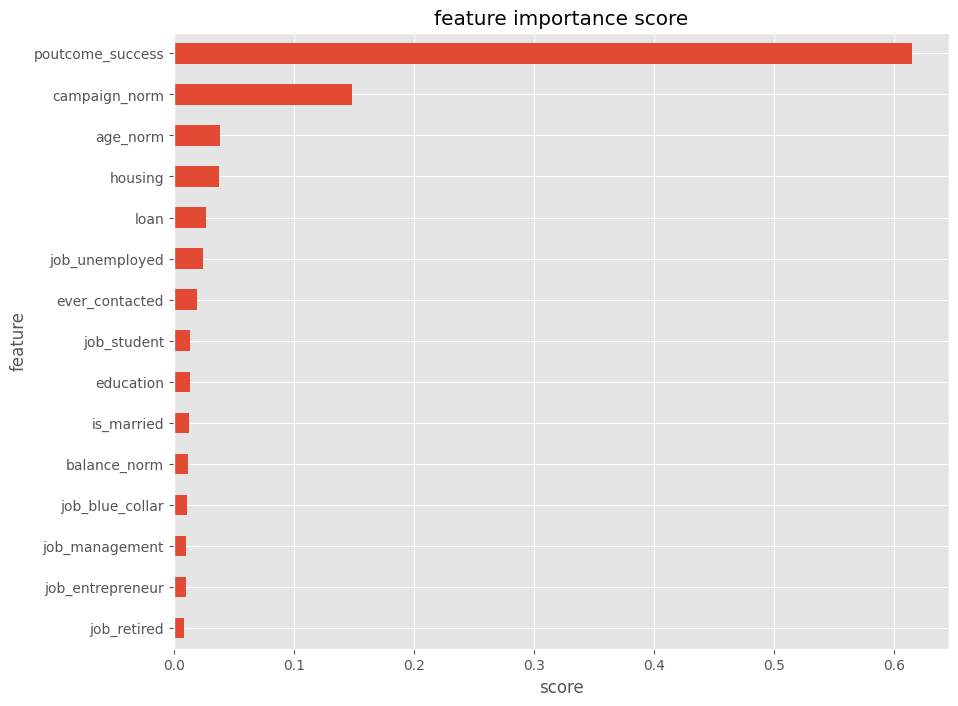

In [ ]:
show_feature_importance(xg_tuned.best_estimator_)

## Adaboost

RUMPANG 20 : AdaBoost

Menggunakan model ML AdaBoost, tampilkan hasil classification pertamanya.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ab = AdaBoostClassifier(random_state=42)
ab.fit(X_train, y_train)

# Evaluasi
eval_classification(ab)

Accuracy (Test Set): 0.75
Precision (Test Set): 0.78
Recall (Test Set): 0.70
F1-Score (Test Set): 0.74
roc_auc (test-proba): 0.82
roc_auc (train-proba): 0.82


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 500)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 200)],
                       algorithm = ['SAMME','SAMME.R']
                      )

# Init model
ab = AdaBoostClassifier(random_state=42)
ab_tuned = RandomizedSearchCV(ab, hyperparameters, random_state=42, cv=5, scoring='recall')
ab_tuned.fit(X_train ,y_train)

# Predict & Evaluation
eval_classification(ab_tuned)

Accuracy (Test Set): 0.74
Precision (Test Set): 0.79
Recall (Test Set): 0.65
F1-Score (Test Set): 0.71
roc_auc (test-proba): 0.81
roc_auc (train-proba): 0.81


Setelah dilakukan hyperparameter tuning nilai recall menurun

# Shap Decision Tree

In [ ]:
!pip install shap

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import shap
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
shap_values = shap.TreeExplainer(dt).shap_values(X_test)

In [ ]:
print(type(shap_values))
if isinstance(shap_values, list):
    print("Jumlah kelas:", len(shap_values))
    print("shap_values[0].shape:", shap_values[0].shape)
    print("shap_values[1].shape:", shap_values[1].shape)
else:
    print("shap_values.shape:", shap_values.shape)

print("X_test.shape:", X_test.shape)

<class 'numpy.ndarray'>
shap_values.shape: (15551, 15, 2)
X_test.shape: (15551, 15)


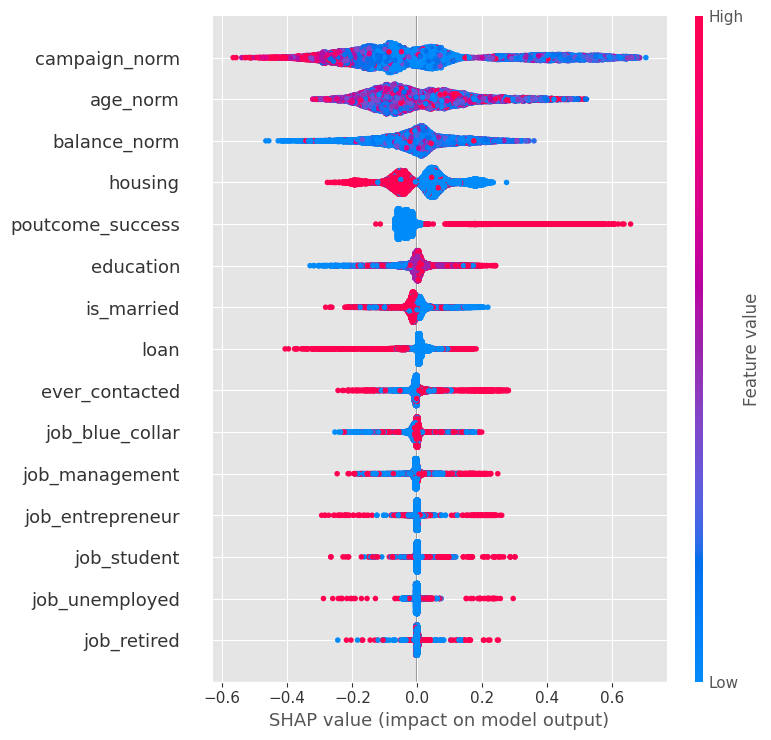

In [ ]:
# Ambil shap value untuk kelas 1 (positif)
shap_values_class1 = shap_values[:, :, 1]

# Buat summary plot
shap.summary_plot(shap_values_class1, X_test)


In [ ]:
explainer = shap.TreeExplainer(dt)
shap.initjs()

# SHAP values untuk sample ke-0 dan kelas 1
sample_index = 0
shap_values_for_sample = shap_values[sample_index, :, 1]

# Force plot
shap.force_plot(explainer.expected_value[1], shap_values_for_sample, X_test.iloc[sample_index, :])